1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_digits
digits = load_digits() 

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
digits_data = digits.data[(digits.target == 1) | (digits.target == 9)]
digits_target = digits.target[(digits.target == 1) | (digits.target == 9)]
len(digits_data)

362

In [5]:
len(digits_target[digits_target == 9])

180

In [6]:
len(digits_target[digits_target == 1])

182

In [7]:
digits_data

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_target,
                                                    test_size=0.20,
                                                   random_state=42)

In [9]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

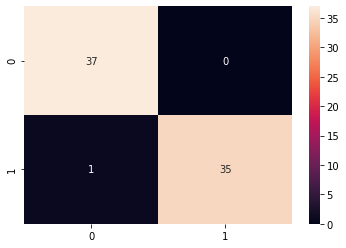

In [10]:
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True)

In [11]:
print(y_test[55])

9


In [12]:
print(prediction[55])

1


In [13]:
X_test[55] # 64 píxeles de 8x8 con un 9

array([ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0., 12., 16., 11., 16.,
       13.,  0.,  0.,  0., 15., 16., 16., 14.,  5.,  0.,  0.,  0.,  8.,
       16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  9.,  0.,  0.,
        0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        8.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,  0.,  0.,  0.])

In [14]:
np.reshape(X_test[55], (8,8))

array([[ 0.,  0.,  7., 15., 16., 12.,  0.,  0.],
       [ 0., 12., 16., 11., 16., 13.,  0.,  0.],
       [ 0., 15., 16., 16., 14.,  5.,  0.,  0.],
       [ 0.,  8., 16., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12.,  1.,  0.,  0.,  0.]])

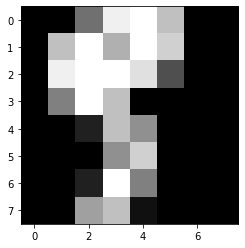

In [16]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(X_test[55], (8,8)), cmap=plt.cm.gray)

In [17]:
pd.set_option('display.max_rows', 100)
df_pred = pd.DataFrame({"digit":y_test, "prediction": prediction})
df_pred["acierto"] = np.where(df_pred["digit"] == df_pred["prediction"], True, False)
df_pred

,digit,prediction,acierto
0,9,9,True
1,9,9,True
2,1,1,True
3,9,9,True
4,9,9,True
5,9,9,True
6,9,9,True
7,1,1,True
8,9,9,True
9,9,9,True


In [18]:
model.classes_

array([1, 9])